##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [1]:
import pandas as pd

train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

Then we separate the tweet text and the label (sentiment). 

In [2]:
#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

#check the result
print("Train length:",len(X_train_raw))

#separating instance and label for Test
X_test_raw = [x[0] for x in test_data[['text']].values]

#check the result
print("Test length:",len(X_test_raw))

Train length: 21802
Test length: 6099


In [3]:
#Let's see one example tweet
print(X_train_raw[1])
print(X_train_raw[42])



 is anybody going to the radio station tomorrow to see shawn? me and my friend may go but we would like to make new friends/meet there (:	
 if tim duncan played one more season we would've been an able to call him 21 savage üòî...


In [4]:
train_data.head()

,Unnamed: 0,id,text,sentiment
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive


### Preprocessing

In [5]:
from bs4 import BeautifulSoup
import spacy
import unidecode
# remove accented words
X_train_raw = list(map(lambda text: unidecode.unidecode(text), X_train_raw))
print(X_train_raw[2])
print(X_train_raw[42])

   

 i just found out naruto didn't become the 5th hokage....	
 if tim duncan played one more season we would've been an able to call him 21 savage uoi...


In [6]:
# expand contractions
import contractions
X_train_raw = list(map(lambda text: contractions.fix(text), X_train_raw))
print(X_train_raw[2])
print(X_train_raw[42])


 i just found out naruto did not become the 5th hokage....	
 if tim duncan played one more season we would have been an able to call him 21 savage uoi...


In [7]:
# remove whitespace
X_train_raw =  [" ".join(text.split()) for text in X_train_raw]
print(X_train_raw[2])
print(X_train_raw[42])


i just found out naruto did not become the 5th hokage....
if tim duncan played one more season we would have been an able to call him 21 savage uoi...


In [8]:
nlp = spacy.load('en_core_web_sm')
docs = list(map(lambda text: nlp(text), X_train_raw))


In [9]:
# remove no/not from stop words
deselect_stop_words = ['no', 'not']
for w in deselect_stop_words:
    nlp.vocab[w].is_stop = False

In [10]:
# remove stopping words

# Create list of word tokens after removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))
for word in ['not', 'no']:
    stop_words.remove(word)
filtered_sentence = [[w  for w in doc.split(' ') if w not in stop_words]for doc in X_train_raw]
print(filtered_sentence[2])
print(filtered_sentence[42])

        

['found', 'naruto', 'not', 'become', '5th', 'hokage....']
['tim', 'duncan', 'played', 'one', 'season', 'would', 'able', 'call', '21', 'savage', 'uoi...']


In [11]:
# Lemmatizing each token
from nltk.stem import WordNetLemmatizer

In [12]:
lemmatizer =  WordNetLemmatizer()


In [13]:
lemmatized_sentence = [[lemmatizer.lemmatize(t) for t in tokenized] for tokenized in filtered_sentence]

In [14]:
X_train_raw = [' '.join(line) for line in lemmatized_sentence]
print(X_train_raw[42])

tim duncan played one season would able call 21 savage uoi...


### split training and testing dataset

In [15]:
#ration between test data and train data
ratio = len(X_test_raw)/(len(X_train_raw)+ len(X_test_raw))
ratio

#### holdOut

#split tfidf train set
from sklearn.model_selection import train_test_split
X_train_set, X_validation_set , y_train_set, y_validation_set = train_test_split(X_train_raw, Y_train, test_size = ratio)

### 1. Bag of Words (BoW)
In this approach, we use the **CountVectorizer** library to separate all the words in the Train corpus (dataset). These words are then used as the 'vectors' or 'features' to represent each instance (Tweet) in `Train` and `Test` datasets. 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

BoW_vectorizer = CountVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using BoW
X_train_BoW = BoW_vectorizer.fit_transform(X_train_set)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_BoW = BoW_vectorizer.transform(X_validation_set)

print("Train feature space size (using BoW):",X_train_BoW.shape)
print("Test feature space size (using BoW):",X_test_BoW.shape)

Train feature space size (using BoW): (17036, 36182)
Test feature space size (using BoW): (4766, 36182)


Now each row is a list of tuples with the vector_id (word_id in the vocabulary) and the number of times it repeated in that given instance (tweet).

#### Improvement using ngram

In [17]:
BoW_vectorizer2 = CountVectorizer(analyzer = "word", ngram_range = (2,2))

#Build the feature set (vocabulary) and vectorise the Tarin dataset using BoW(ngram = 2)
X_train_BoW2 = BoW_vectorizer2.fit_transform(X_train_set)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset (ngram = 2)
X_test_BoW2 = BoW_vectorizer2.transform(X_validation_set)

print("Train feature space size (using BoW):",X_train_BoW2.shape)
print("Test feature space size (using BoW):",X_test_BoW2.shape)

Train feature space size (using BoW): (17036, 149048)
Test feature space size (using BoW): (4766, 149048)


### 2. TFIDF
In this approach, we use the **TfidfVectorizer** library to separate all the words in this corpus (dataset). Same as the BoW approach, these words are then used as the 'vectors' or 'features' to represent each instance (Tweet).

However, in this method for each instance the value associated with each 'vector' (word) is not the number of times the word repeated in that tweet, but the TFIDF value of then 'voctor' (word).

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_set)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf = tfidf_vectorizer.transform(X_validation_set)

print("Train feature space size (using TFIDF):",X_train_tfidf.shape)
print("Test feature space size (using TFIDF):",X_test_tfidf.shape)


Train feature space size (using TFIDF): (17036, 36182)
Test feature space size (using TFIDF): (4766, 36182)


#### ngrams

In [19]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (2,2))

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF(ngram)
X_train_tfidf2 = tfidf_vectorizer.fit_transform(X_train_set)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset (ngram)
X_test_tfidf2 = tfidf_vectorizer.transform(X_validation_set)

print("Train feature space size (using TFIDF):",X_train_tfidf2.shape)
print("Test feature space size (using TFIDF):",X_test_tfidf2.shape)

Train feature space size (using TFIDF): (17036, 149048)
Test feature space size (using TFIDF): (4766, 149048)


### Dimension Selection

In [20]:

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold, f_regression


#### Select k best features(ch2)

##### tfidf(1gram)

In [21]:
k_best_tfidf_1gram = SelectKBest(chi2, k=1600)
X_ch2_train_tfidf = k_best_tfidf_1gram.fit_transform(X_train_tfidf, y_train_set)
X_ch2_test_tfidf =  k_best_tfidf_1gram.transform(X_test_tfidf)


##### tfidf(2grams)

In [22]:
k_best_tfidf_2gram = SelectKBest(chi2, k=1600)

In [23]:
X_ch2_train_tfidf2 = k_best_tfidf_2gram.fit_transform(X_train_tfidf2, y_train_set)

In [24]:
X_ch2_test_tfidf2 = k_best_tfidf_2gram.transform(X_test_tfidf2)

###### BoW(1gram)

In [25]:
k_best_BoW_1gram = SelectKBest(chi2, k=1600)
X_ch2_train_BoW = k_best_BoW_1gram.fit_transform(X_train_BoW, y_train_set)
X_ch2_test_BoW =  k_best_BoW_1gram.transform(X_test_BoW)

##### BoW(2gram)

In [26]:
k_best_BoW_2gram = SelectKBest(chi2, k=1600)
X_ch2_train_BoW2 = k_best_BoW_2gram.fit_transform(X_train_BoW2, y_train_set)
X_ch2_test_BoW2 =  k_best_BoW_2gram.transform(X_test_BoW2)

#### SelectKBest + F-test

In [27]:

X_f_classif_new = SelectKBest(f_classif, k = 1600).fit_transform(X_train_tfidf2, y_train_set)
X_f_classif_new.shape

(17036, 1600)

#### SelectKBest + MI

In [28]:
#X_MI_new = SelectKBest(mutual_info_classif, k = 2000).fit_transform(X_train_tfidf2, y_train_set)
#X_MI_new.shape # Some bugs for this cell

#### VarianceThreshold

##### tfidf(2gram)

In [29]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.00003)
x_var_train_tfidf2 = selector.fit_transform(X_train_tfidf2)
print(x_var_train_tfidf2.shape)

(17036, 1292)


In [30]:
x_var_valid_tfidf2 = selector.fit_transform(X_test_tfidf2)

##### tfidf(1gram)

In [31]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.00005)
x_var_train_tfidf = selector.fit_transform(X_train_tfidf)
print(x_var_train_tfidf.shape)

(17036, 3252)


In [32]:
x_var_valid_tfidf = selector.transform(X_test_tfidf)

##### BoW (2gram)

In [33]:
selector = VarianceThreshold(threshold = 0.0003) # why the variance threshold between BoW and tfidf is different, and how to judge the variance threshold
x_var_train_BoW2 = selector.fit_transform(X_train_BoW2)
print(x_var_train_BoW2.shape)

(17036, 1483)


In [34]:
x_var_valid_BoW2 = selector.fit_transform(X_test_BoW2)

##### BoW(1gram)

In [35]:
selector = VarianceThreshold(threshold = 0.0008) # why the variance threshold between BoW and tfidf is different, and how to judge the variance threshold
x_var_train_BoW = selector.fit_transform(X_train_BoW)
print(x_var_train_BoW.shape)

(17036, 2218)


In [36]:
x_var_valid_BoW = selector.fit_transform(X_test_BoW)

#### k-fold cross-validation

In [37]:
#length of test cases
m = len(X_test_raw)
# length of training cases 
n = len(X_train_raw)
n_split = n/m

In [38]:
n_split

3.574684374487621

In [39]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits = int(n_split))

In [40]:
for train, test in kf.split(X_train_raw):
    print("%s %s" % (train, test))

[ 7268  7269  7270 ... 21799 21800 21801] [   0    1    2 ... 7265 7266 7267]
[    0     1     2 ... 21799 21800 21801] [ 7268  7269  7270 ... 14532 14533 14534]
[    0     1     2 ... 14532 14533 14534] [14535 14536 14537 ... 21799 21800 21801]


### Model Selection

#### baseline

In [41]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy = "most_frequent")
model = clf.fit(X_train_set, y_train_set)
print("Baseline accuracy is ", model.score(X_validation_set, y_validation_set))

Baseline accuracy is  0.578052874527906


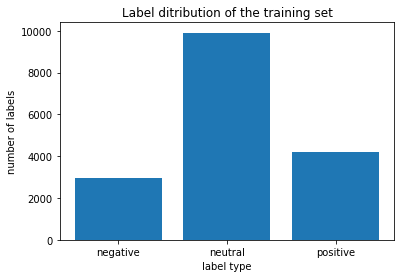

In [43]:
import matplotlib.pyplot as plt
import collections

counter = dict(collections.Counter(y_train_set))
data = counter.values()
label = counter.keys()
plt.bar(label, data)
plt.title("Label ditribution of the Sub-training set")
plt.xlabel("label type")
plt.ylabel("number of labels")
plt.show()


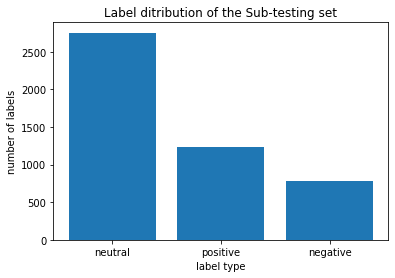

In [44]:
import matplotlib.pyplot as plt

import collections 
counter = dict(collections.Counter(y_validation_set))
data = counter.values()
label = counter.keys()
plt.bar(label, data)
plt.title("Label ditribution of the Sub-testing set")
plt.xlabel("label type")
plt.ylabel("number of labels")
plt.show()

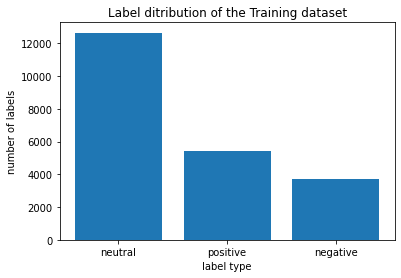

In [45]:
import matplotlib.pyplot as plt
import collections 
counter = dict(collections.Counter(Y_train))
data = counter.values()
label = counter.keys()
plt.bar(label, data)
plt.title("Label ditribution of the Training dataset")
plt.xlabel("label type")
plt.ylabel("number of labels")
plt.show()

#### Logistic regression

##### cross validation BoW

In [46]:
# Cross Validation in BoW case
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
t0 = time.time()
lr_acc = cross_val_score(LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000), X_train_BoW, y_train_set, cv=3)
t1 = time.time()-t0
print("accuracy of cross validation in BoW case", np.mean(lr_acc))
print("Execution time", t1)


accuracy of cross validation in BoW case 0.6389405707400648
Execution time 15.10176396369934


##### BoW holdout

In [47]:
#BoW holdout
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_train_BoW, y_train_set)
y_predict = clf.predict(X_test_BoW)
t0 = time.time()
lr_acc = clf.score(X_test_BoW, y_validation_set)
t1 = time.time()-t0
print("Execution time", t1)
print("accuracy of holdout in BoW case is",lr_acc)
precision = precision_score(y_validation_set, y_predict, average = "macro")
print("Macro Precision is ", precision)
recall = recall_score(y_validation_set, y_predict, average = "macro")
print("Macro Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict, average = "macro")
print("Macro F1 score is ", f1)
precision = precision_score(y_validation_set, y_predict, average = "weighted")
print("Weighted Precision is ", precision)
recall = recall_score(y_validation_set, y_predict, average = "weighted")
print("Weighted Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict, average = "weighted")
print("Weighted F1 score is ", f1)


Execution time 0.006501197814941406
accuracy of holdout in BoW case is 0.6529584557280739
Macro Precision is  0.6151643974806403
Macro Recall is  0.5583983541505342
Macro F1 score is  0.5777748496860093
Weighted Precision is  0.6429007696831315
Weighted Recall is  0.6529584557280739
Weighted F1 score is  0.6410717543677024


/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


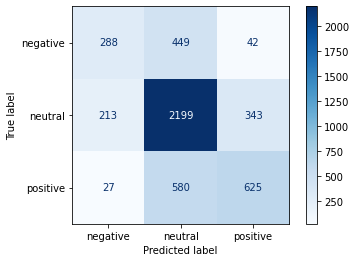

In [48]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test_BoW, y_validation_set, cmap = plt.cm.Blues)
plt.show()

##### BoW ngrams holdout

In [49]:
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_train_BoW2, y_train_set)
y_predict2 = clf.predict(X_test_BoW2)
t0 = time.time()
lr_acc = clf.score(X_test_BoW2, y_validation_set)
t1 = time.time() - t0
print("Execution time", t1)
print("accuracy of holdout in BoW case", lr_acc)

precision = precision_score(y_validation_set, y_predict2, average = "macro")
print("Macro Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "macro")
print("Macro Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "macro")
print("Macro F1 score is ", f1)
precision = precision_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted F1 score is ", f1)


Execution time 0.01701974868774414
accuracy of holdout in BoW case 0.6078472513638271
Macro Precision is  0.5709988514887444
Macro Recall is  0.4101247029570256
Macro F1 score is  0.3981798950932311
Weighted Precision is  0.5918097461068301
Weighted Recall is  0.6078472513638271
Weighted F1 score is  0.5330106323589621


/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


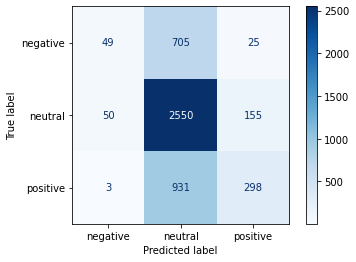

In [50]:
plot_confusion_matrix(clf, X_test_BoW2, y_validation_set, cmap = plt.cm.Blues)
plt.show()

##### BoW ngrams cross validation

In [51]:
# Cross Validation in BoW case(ngrams)
t0 = time.time()
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000)
t1 = time.time()-t0
lr_acc = cross_val_score(clf, X_train_BoW2,  y_train_set, cv=3)
f1_macro = cross_val_score(clf, X_train_BoW2,y_train_set, cv=3, scoring='f1_macro')
recall_macro =  cross_val_score(clf, X_train_BoW2,y_train_set, cv=3, scoring='recall_macro')
precision_macro = cross_val_score(clf, X_train_BoW2, y_train_set, cv=3, scoring='precision_macro')
print("accuracy of cross validation in BoW case", np.mean(lr_acc))
print("macro recall ", np.mean(recall_macro))
print("macro F1 ", np.mean(f1_macro))
print("macro precision ", np.mean(precision_macro))
f1_weighted = cross_val_score(clf, X_train_BoW2,y_train_set, cv=3, scoring='f1_weighted')
recall_weighted =  cross_val_score(clf, X_train_BoW2,y_train_set, cv=3, scoring='recall_weighted')
precision_weighted = cross_val_score(clf, X_train_BoW2,y_train_set, cv=3, scoring='precision_weighted')
print("Weighted recall ", np.mean(recall_weighted))
print("Weighted F1 ", np.mean(f1_weighted))
print("Weighted precision ", np.mean(precision_weighted))

accuracy of cross validation in BoW case 0.6096505496408032
macro recall  0.4010880708310112
macro F1  0.3807981231372101
macro precision  0.5809770064344765
Weighted recall  0.6096505496408032
Weighted F1  0.5234699913110038
Weighted precision  0.5965862927610149


In [52]:

'''from sklearn.model_selection import cross_val_predict
actual_classes, predicted_classes, _ = cross_val_predict(clf,  X_train_BoW2,y_train_set, 3)
matrix = confusion_matrix(actual_classes, predicted_classes)
sns.heatmap(matrix, annot=True,  cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()'''

'from sklearn.model_selection import cross_val_predict\nactual_classes, predicted_classes, _ = cross_val_predict(clf,  X_train_BoW2,y_train_set, 3)\nmatrix = confusion_matrix(actual_classes, predicted_classes)\nsns.heatmap(matrix, annot=True,  cmap="Blues", fmt="g")\nplt.xlabel(\'Predicted\'); plt.ylabel(\'Actual\'); plt.title(\'Confusion Matrix\')\nplt.show()'

##### BoW holdout(dimension reduction) 

In [53]:
import matplotlib.pyplot as plt

In [54]:
#BoW holdout
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_ch2_train_BoW2, y_train_set)
#clf.predict(x_var_valid_BoW2)
t0 = time.time()
lr_acc = clf.score(X_ch2_test_BoW2, y_validation_set)
y_predict2 = clf.predict(X_ch2_test_BoW2)
t1 = time.time() - t0
print("Execution time", t1)
print("accuracy of holdout in BoW case(2gram, dimension reduction)",lr_acc)

precision = precision_score(y_validation_set, y_predict2, average = "macro")
print("Macro Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "macro")
print("Macro Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "macro")
print("Macro F1 score is ", f1)
precision = precision_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted F1 score is ", f1)



Execution time 0.008695840835571289
accuracy of holdout in BoW case(2gram, dimension reduction) 0.6038606798153587
Macro Precision is  0.5622521727291777
Macro Recall is  0.4199525569601042
Macro F1 score is  0.41892541516979964
Weighted Precision is  0.5853804115590932
Weighted Recall is  0.6038606798153587
Weighted F1 score is  0.540270996438918


/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


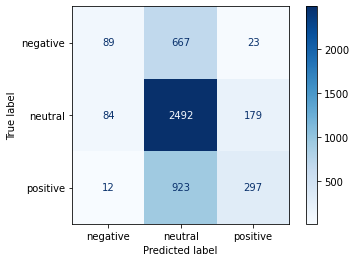

In [55]:
plot_confusion_matrix(clf, X_ch2_test_BoW2, y_validation_set, cmap = plt.cm.Blues)
plt.show()

In [56]:
x_var_valid_BoW2.shape

(4766, 2270)

In [57]:
x_var_train_BoW2.shape

(17036, 1483)

##### BoW cross validation

In [58]:
# Cross Validation in BoW case(ngrams)

lr_acc = cross_val_score(LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000), X_ch2_train_BoW2,  y_train_set, cv=3)

print("accuracy of cross validation in BoW case(2 gram with reduction)", np.mean(lr_acc))

# Cross Validation in BoW case(1grams)
lr_acc = cross_val_score(LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000), X_ch2_train_BoW,  y_train_set, cv=3)

print("accuracy of cross validation in BoW case(1 gram with reduction)", np.mean(lr_acc))

accuracy of cross validation in BoW case(2 gram with reduction) 0.6469829263094229
accuracy of cross validation in BoW case(1 gram with reduction) 0.6837867825249825


##### BoW hold out (1-gram with dim reduction )

In [59]:

clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_ch2_train_BoW, y_train_set)
clf.predict(X_ch2_test_BoW)

# accuracy of testing data
print("test accuracy of tfidf in holdout case: ", clf.score(X_ch2_test_BoW,y_validation_set))

#accuracy of training data
print("train accuracy of tfidf in holdout case: ", clf.score(X_ch2_train_BoW, y_train_set))

test accuracy of tfidf in holdout case:  0.6636592530423836
train accuracy of tfidf in holdout case:  0.7567504108945762


evaluation metrics


Execution time 0.015001058578491211
accuracy of holdout in BoW case(2gram, dimension reduction) 0.6636592530423836
Macro Precision is  0.6398903579490487
Macro Recall is  0.5570438276477185
Macro F1 score is  0.5821717659820124
Weighted Precision is  0.6568886646339424
Weighted Recall is  0.6636592530423836
Weighted F1 score is  0.6474527621615017


/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


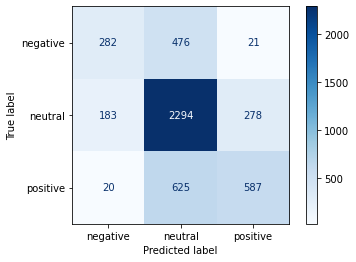

In [109]:
#BoW holdout
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_ch2_train_BoW, y_train_set)
#clf.predict(x_var_valid_BoW2)
t0 = time.time()
lr_acc = clf.score(X_ch2_test_BoW, y_validation_set)
y_predict2 = clf.predict(X_ch2_test_BoW)
t1 = time.time() - t0
print("Execution time", t1)
print("accuracy of holdout in BoW case(2gram, dimension reduction)",lr_acc)

precision = precision_score(y_validation_set, y_predict2, average = "macro")
print("Macro Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "macro")
print("Macro Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "macro")
print("Macro F1 score is ", f1)
precision = precision_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted F1 score is ", f1)

plot_confusion_matrix(clf, X_ch2_test_BoW, y_validation_set, cmap = plt.cm.Blues)
plt.show()

##### tfidf holdout

In [60]:
#tfidf case in logistic regression model (hold out)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_train_tfidf, y_train_set)
clf.predict(X_test_tfidf)

# accuracy of testing data
print("test accuracy of tfidf in holdout case: ", clf.score(X_test_tfidf,y_validation_set))

#accuracy of training data
print("train accuracy of tfidf in holdout case: ", clf.score(X_train_tfidf, y_train_set))

test accuracy of tfidf in holdout case:  0.6592530423835501
train accuracy of tfidf in holdout case:  0.7991899506926509


##### tfidf 1-gram no dimension reduction cross validation 

In [61]:
# cross validation in tfidf case
from sklearn.model_selection import cross_val_score
lr_acc = cross_val_score(LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000), X_train_tfidf, y_train_set, cv=3)

print("accuracy of cross validation in tfidf case",np.mean(lr_acc))

accuracy of cross validation in tfidf case 0.6486847834633293


##### 1-gram with dimension reduction cross validation tfidf

In [62]:
# cross validation in tfidf case
from sklearn.model_selection import cross_val_score
lr_acc = cross_val_score(LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000), X_ch2_train_tfidf, y_train_set, cv=3)

print("accuracy of cross validation in tfidf case",np.mean(lr_acc))

accuracy of cross validation in tfidf case 0.6581942130674999


##### 2-gram holdout(without dimension reduction)

In [63]:
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_train_tfidf2, y_train_set)
clf.predict(X_test_tfidf2)

# accuracy of testing data
print("test accuracy of tfidf2 in holdout case: ", clf.score(X_test_tfidf2,y_validation_set))

#accuracy of training data
print("train accuracy of tfidf2 in holdout case: ", clf.score(X_train_tfidf2, y_train_set))




test accuracy of tfidf2 in holdout case:  0.5992446496013428
train accuracy of tfidf2 in holdout case:  0.7967832824606715


##### 1gram with dimension reduction

In [64]:
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_ch2_train_tfidf, y_train_set)

y_predict2 = clf.predict(X_ch2_test_tfidf)
t0 = time.time()
# accuracy of testing data
print("test accuracy of tfidf3 in holdout case: ", clf.score(X_ch2_test_tfidf,y_validation_set))

t1 = time.time() - t0
print("Execution time", t1)
#accuracy of training data
print("train accuracy of tfidf3 in holdout case: ", clf.score(X_ch2_train_tfidf, y_train_set))


print("accuracy of holdout in BoW case(2gram, dimension reduction)",lr_acc)

precision = precision_score(y_validation_set, y_predict2, average = "macro")
print("Macro Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "macro")
print("Macro Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "macro")
print("Macro F1 score is ", f1)
precision = precision_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted F1 score is ", f1)

test accuracy of tfidf3 in holdout case:  0.6621905161561058
Execution time 0.0038220882415771484
train accuracy of tfidf3 in holdout case:  0.6999295609297957
accuracy of holdout in BoW case(2gram, dimension reduction) [0.66173622 0.65803839 0.65480803]
Macro Precision is  0.6510353500167957
Macro Recall is  0.5270464706379451
Macro F1 score is  0.5534941717404013
Weighted Precision is  0.6589490979786168
Weighted Recall is  0.6621905161561058
Weighted F1 score is  0.6347774780242773


##### 2-gram with dimension reduction cross validation 


In [65]:

lr_acc = cross_val_score(LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000), X_ch2_train_tfidf2, y_train_set, cv=3)

print("accuracy of cross validation in tfidf case",np.mean(lr_acc))

accuracy of cross validation in tfidf case 0.6007279744603271


##### 2-gram with dimension reduction holdout


In [66]:
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 10000).fit(X_ch2_train_tfidf2, y_train_set)

y_predict2 = clf.predict(X_ch2_test_tfidf2)
t0 = time.time()
# accuracy of testing data
print("test accuracy of tfidf in holdout case: ", clf.score(X_ch2_test_tfidf2,y_validation_set))

t1 = time.time() - t0
print("Execution time", t1)
#accuracy of training data
print("train accuracy of tfidf in holdout case: ", clf.score(X_ch2_train_tfidf2, y_train_set))


test accuracy of tfidf in holdout case:  0.5965169953839697
Execution time 0.0034029483795166016
train accuracy of tfidf in holdout case:  0.6166940596384127


#### SVM

##### BoW holdout

In [67]:
### BoW holdout
from sklearn.svm import SVC
t0 = time.time()
clf = SVC(kernel = "linear", C = 0.1).fit(X_train_BoW, y_train_set)
y_train_BoW_predicted = clf.predict(X_train_BoW)
t1 = time.time()-t0
print("BoW holdout\n")
print("execution time: ", t1)
print("training accuracy: ", np.mean(y_train_BoW_predicted == y_train_set))

y_predicted2 = clf.predict(X_test_BoW)

print("testing accuracy", clf.score(X_test_BoW, y_validation_set))

precision = precision_score(y_validation_set, y_predict2, average = "macro")
print("Macro Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "macro")
print("Macro Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "macro")
print("Macro F1 score is ", f1)
precision = precision_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Precision is ", precision)
recall = recall_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted Recall is ", recall)
f1 = f1_score(y_validation_set, y_predict2, average = "weighted")
print("Weighted F1 score is ", f1)



BoW holdout

execution time:  1016.4233191013336
training accuracy:  0.8105189011505048
testing accuracy 0.6615610574905582
Macro Precision is  0.5658424529282606
Macro Recall is  0.4034395329634584
Macro F1 score is  0.39366246075364836
Weighted Precision is  0.5804281820063512
Weighted Recall is  0.5965169953839697
Weighted F1 score is  0.523041436355039


##### tfidf holdout

In [68]:
### tfidf holdout
clf = SVC(kernel = "linear", C = 0.1).fit(X_train_tfidf, y_train_set)
y_train_tfidf_predicted = clf.predict(X_train_tfidf)
print("Tfidf holdout")
print("training accuracy: ", np.mean(y_train_tfidf_predicted == y_train_set))

y_valid_tfidf_predicted = clf.predict(X_test_tfidf)

print("testing accuracy", clf.score(X_test_tfidf, y_validation_set))

Tfidf holdout
training accuracy:  0.6048368161540267
testing accuracy 0.5958875367184222


##### BoW Validation

In [69]:
### BoW cross validation
svm_BoW_acc = cross_val_score(SVC(kernel = "linear", C = 0.1), X_train_BoW, y_train_set, cv=3)
print("BoW cross validation")
print("accuracy: ", np.mean(svm_BoW_acc))

BoW cross validation
accuracy:  0.6581352485152231


##### tfidf cross validation

In [70]:
### tfidf cross validation
svm_tfidf_acc = cross_val_score(SVC(kernel = "linear", C = 0.1), X_train_tfidf, y_train_set, cv=3)
print("tfidf cross validation")
print("accuracy: ", np.mean(svm_tfidf_acc))

tfidf cross validation
accuracy:  0.5905728912786486


##### tfidf holdout(ngrams)

In [71]:
clf = SVC(kernel = "linear", C = 0.1).fit(X_train_tfidf2, y_train_set)
y_train_tfidf_predicted = clf.predict(X_train_tfidf2)
print("Tfidf holdout")
print("training accuracy: ", np.mean(y_train_tfidf_predicted == y_train_set))

y_valid_tfidf_predicted = clf.predict(X_test_tfidf2)

print("testing accuracy", clf.score(X_test_tfidf2, y_validation_set))

Tfidf holdout
training accuracy:  0.5847029819206386
testing accuracy 0.5826689047419219


##### tfidf cross validation(ngrams)

In [72]:
### tfidf cross validation
svm_tfidf_acc = cross_val_score(SVC(kernel = "linear", C = 0.1), X_train_tfidf2, y_train_set, cv=3)
print("tfidf cross validation")
print("accuracy: ", np.mean(svm_tfidf_acc))

tfidf cross validation
accuracy:  0.5814745285435675


##### tfidf cross validation(1-gram with dimension reduction)

In [73]:
### tfidf cross validation
svm_tfidf_acc = cross_val_score(SVC(kernel = "linear", C = 0.1), X_ch2_train_tfidf, y_train_set, cv=3)
print("tfidf cross validation")
print("accuracy: ", np.mean(svm_tfidf_acc))

tfidf cross validation
accuracy:  0.5889880225255341


##### tfidf holdout(1-gram with dimension reduction)

In [74]:
clf = SVC(kernel = "linear", C = 0.1).fit(X_ch2_train_tfidf, y_train_set)
y_train_tfidf_predicted = clf.predict(X_ch2_train_tfidf)
print("Tfidf holdout")
print("training accuracy: ", np.mean(y_train_tfidf_predicted == y_train_set))

y_valid_tfidf_predicted = clf.predict(X_ch2_test_tfidf)

print("testing accuracy", clf.score(X_ch2_test_tfidf, y_validation_set))

Tfidf holdout
training accuracy:  0.598966893637004
testing accuracy 0.5935795216114141


##### tfidf cross validation(2-gram with dimension reduction)

In [75]:
### tfidf cross validation
svm_tfidf_acc = cross_val_score(SVC(kernel = "linear", C = 0.1), X_ch2_train_tfidf2, y_train_set, cv=3)
print("tfidf cross validation")
print("accuracy: ", np.mean(svm_tfidf_acc))

tfidf cross validation
accuracy:  0.581415832763794


##### tfidf holdout(2-gram with dimension reduction)

##### BoW holdout(ngram)

In [76]:

clf = SVC(kernel = "linear", C = 0.1).fit(X_train_BoW2, y_train_set)
y_train_BoW_predicted = clf.predict(X_train_BoW2)
print("BoW holdout\n")
print("training accuracy: ", np.mean(y_train_BoW_predicted == y_train_set))

y_valid_BoW_predicted = clf.predict(X_test_BoW2)

print("testing accuracy", clf.score(X_test_BoW2, y_validation_set))

BoW holdout

training accuracy:  0.9441770368631134
testing accuracy 0.6032312211498112


##### BoW cross validation(ngrams)

In [77]:
### BoW cross validation
svm_BoW_acc = cross_val_score(SVC(kernel = "linear", C = 0.1), X_train_BoW2,y_train_set, cv=3)
print("BoW cross validation")
print("accuracy: ", np.mean(svm_BoW_acc))

BoW cross validation
accuracy:  0.6078307840571512


##### 1-gram BoW hold out with dimension reduction

In [78]:
clf = SVC(kernel = "linear", C = 0.1).fit(X_ch2_train_BoW, y_train_set)
y_train_BoW_predicted = clf.predict(X_ch2_train_BoW)
print("BoW holdout\n")
print("training accuracy: ", np.mean(y_train_BoW_predicted == y_train_set))

y_valid_BoW_predicted = clf.predict(X_ch2_test_BoW)

print("testing accuracy", clf.score(X_ch2_test_BoW, y_validation_set))

BoW holdout

training accuracy:  0.6974054942474759
testing accuracy 0.653797733948804


##### 2-gram BoW cross validation with dimension reduction 

In [79]:
### BoW cross validation
svm_BoW_acc = cross_val_score(SVC(kernel = "linear", C = 0.1),X_ch2_train_BoW2,y_train_set, cv=3)
print("BoW cross validation")
print("accuracy: ", np.mean(svm_BoW_acc))

BoW cross validation
accuracy:  0.60389777399098


##### 2-gram BoW hold out with dimension reduction

In [80]:
clf = SVC(kernel = "linear", C = 0.1).fit(X_ch2_train_BoW2, y_train_set)
y_train_BoW_predicted = clf.predict(X_ch2_train_BoW2)
print("BoW holdout\n")
print("training accuracy: ", np.mean(y_train_BoW_predicted == y_train_set))

y_valid_BoW_predicted = clf.predict(X_ch2_test_BoW2)

print("testing accuracy", clf.score(X_ch2_test_BoW2, y_validation_set))

BoW holdout

training accuracy:  0.6168114580887533
testing accuracy 0.5990348300461603


In [81]:

'''from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.01, 0.1, 1, 10]}
grid_search_svc = GridSearchCV(SVC(), parameters,refit = True)
grid_search_svc.fit(X_train_BoW,y_train_set)'''

"from sklearn.model_selection import GridSearchCV\nparameters = {'kernel': ('linear', 'rbf'), 'C': [0.01, 0.1, 1, 10]}\ngrid_search_svc = GridSearchCV(SVC(), parameters,refit = True)\ngrid_search_svc.fit(X_train_BoW,y_train_set)"

In [82]:
'''grid_search_svc.cv_results_.keys()'''

'grid_search_svc.cv_results_.keys()'

In [83]:
'''grid_search_svc.best_estimator_'''

'grid_search_svc.best_estimator_'

#### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
## grid search
grid_param = {
    "n_estimators": [90, 100, 115, 130],
    "criterion": ['gini', 'entropy'],
    "max_depth": range(2, 20, 1),
    "min_samples_leaf": range(1, 10, 1),
    "min_samples_split": range(2, 10, 1),
    "max_features": ['auto', 'log2']
}

In [85]:
### BoW crossValidation
max = 0
for curr_max_depth in range(2, 20, 1):
    svm_BoW_acc = cross_val_score (RandomForestClassifier(max_depth = curr_max_depth, random_state = 0), X_train_BoW, y_train_set, cv=3)
   
    if max < np.mean(svm_BoW_acc):
        max_depth = curr_max_depth
        max = np.mean(svm_BoW_acc)
    

In [86]:
max_acc = 0
for curr_min_samples_leaf in range(1, 10,1):
    curr_acc = cross_val_score (RandomForestClassifier(max_depth = 18, random_state = 0, min_samples_leaf = curr_min_samples_leaf),
                                     X_train_BoW, y_train_set, cv=3)
    curr_acc = np.mean(curr_acc)
    if  curr_acc > max_acc:
        max_acc = curr_acc 
        min_samples_leaf = curr_min_samples_leaf
  

In [87]:
max_acc = 0
for curr_min_samples_split in range(2, 20,2):
    curr_acc = cross_val_score (RandomForestClassifier(max_depth = 18, random_state = 0, min_samples_leaf = 1, min_samples_split=curr_min_samples_split),
                                     X_train_BoW, y_train_set, cv=3)
    curr_acc = np.mean(curr_acc)
    if  curr_acc > max_acc:
        max_acc = curr_acc 
        min_samples_split = curr_min_samples_split

In [88]:
min_samples_leaf

1

In [89]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator =RandomForestClassifier(), param_grid = grid_param, cv = 3, n_jobs = -1, verbose = 3)

In [ ]:
grid_search.fit(X_train_BoW, y_train_set)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [91]:
max_depth = 18
min_samples_leaf = 1
min_samples_split = 2

In [92]:
### BoW holdout 1-gram no dim reduction 

clf = RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90, 
                             min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_train_BoW,y_train_set)
clf.predict(X_test_BoW)
print("BoW holdout")
print("training accuracy", clf.score(X_train_BoW, y_train_set))
print("testing accuracy: ", clf.score(X_test_BoW, y_validation_set))

BoW holdout
training accuracy 0.5830594036158723
testing accuracy:  0.5784725136382711


In [93]:
### tfidf holdout 1-gram no dim reduction
clf = RandomForestClassifier(random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                            min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_train_tfidf, y_train_set)
clf.predict(X_test_tfidf)
print("tfidf holdout")
print("training accuracy", clf.score(X_train_tfidf, y_train_set))
print("testing accuracy: ", clf.score(X_test_tfidf, y_validation_set))

tfidf holdout
training accuracy 0.5828246067151913
testing accuracy:  0.5782626940830885


In [94]:
### BoW crossValidation 1-gram no dim reduction
rf_BoW_acc = cross_val_score (RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                                                     min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split), X_train_BoW, y_train_set, cv=3)
print("BoW cross validation")

print("accuracy: ", np.mean(rf_BoW_acc))

BoW cross validation
accuracy:  0.5814158431011981


In [95]:
### tfidf crossValidation 1-gram no dim reduction
rf_tfidf_acc = cross_val_score ((RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90, 
                             min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)), X_train_tfidf,y_train_set, cv=3)
print("tfidf cross validation")
print("accuracy: ", np.mean(rf_tfidf_acc))

tfidf cross validation
accuracy:  0.5815919511153264


In [105]:
# tfidf 2-gram no dim reduction
clf = RandomForestClassifier(random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                            min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_train_tfidf2, y_train_set)
clf.predict(X_test_tfidf2)
print("tfidf holdout")
print("training accuracy", clf.score(X_train_tfidf2, y_train_set))
print("testing accuracy: ", clf.score(X_test_tfidf2, y_validation_set))

tfidf holdout
training accuracy 0.5813571260859357
testing accuracy:  0.578052874527906


##### 2gram case

In [97]:
# bow 2-gram no dim reduction cv
rf_BoW_acc = cross_val_score (RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                                                     min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split), X_train_BoW2, y_train_set, cv=3)
print("BoW cross validation")

print("accuracy: ", np.mean(rf_BoW_acc))

BoW cross validation
accuracy:  0.5813571369840207


bow 2-gram holdout no dim reduction

In [99]:
clf = RandomForestClassifier(random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                            min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_train_BoW2, y_train_set)
clf.predict(X_test_BoW2)
print("tfidf holdout")
print("training accuracy", clf.score(X_train_BoW2, y_train_set))
print("testing accuracy: ", clf.score(X_test_BoW2, y_validation_set))

tfidf holdout
training accuracy 0.5813571260859357
testing accuracy:  0.578052874527906


tfidf 2-gram holdout no dim reduction

In [98]:
rf_tfidf_acc = cross_val_score (RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                                                     min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split), X_train_tfidf2,y_train_set, cv=3)
print("tfidf cross validation")

print("accuracy: ", np.mean(rf_BoW_acc))

tfidf cross validation
accuracy:  0.5813571369840207


##### BoW 1gram dimension reduction

In [101]:
rf_BoW_acc = cross_val_score (RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                                                     min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split),X_ch2_train_BoW, y_train_set, cv=3)
print("BoW cross validation")

print("accuracy: ", np.mean(rf_BoW_acc))

BoW cross validation
accuracy:  0.6011974579992828


BoW 1gram dimension reduction holdout 

In [103]:
clf = RandomForestClassifier(random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                            min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_ch2_train_BoW, y_train_set)
clf.predict(X_ch2_test_BoW)
print("tfidf holdout")
print("training accuracy", clf.score(X_ch2_train_BoW, y_train_set))
print("testing accuracy: ", clf.score(X_test_tfidf, y_validation_set))

tfidf holdout
training accuracy 0.6182202394928387
testing accuracy:  0.5971464540495174


#### tfidf 1gram dimension reduction cv

In [106]:
rf_tfidf_acc = cross_val_score (RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                                                     min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split), X_ch2_train_tfidf,y_train_set, cv=3)
print("tfidf cross validation")

print("accuracy: ", np.mean(rf_tfidf_acc))

tfidf cross validation
accuracy:  0.6013734316271592


#### tfidf 1-gram dimension reduction hold out

In [104]:
clf = RandomForestClassifier(random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                            min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_ch2_train_tfidf, y_train_set)
clf.predict(X_ch2_test_tfidf)
print("tfidf holdout")
print("training accuracy", clf.score(X_ch2_train_tfidf, y_train_set))
print("testing accuracy: ", clf.score(X_ch2_test_tfidf, y_validation_set))

tfidf holdout
training accuracy 0.619335524771073
testing accuracy:  0.5990348300461603


##### 2gram dimension reduction

In [ ]:
rf_BoW_acc = cross_val_score (RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                                                     min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split),x_var_train_BoW2,y_train_set, cv=3)
print("BoW cross validation")

print("accuracy: ", np.mean(rf_BoW_acc))

BoW cross validation
accuracy:  0.5925603138531031


In [108]:
clf = RandomForestClassifier(random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                            min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_ch2_train_BoW2, y_train_set)
clf.predict(X_ch2_test_BoW2)
print("tfidf holdout")
print("training accuracy", clf.score(X_ch2_train_BoW2, y_train_set))
print("testing accuracy: ", clf.score(X_ch2_test_BoW2, y_validation_set))

tfidf holdout
training accuracy 0.6006691711669406
testing accuracy:  0.5895929500629459


In [ ]:
rf_tfidf_acc = cross_val_score (RandomForestClassifier( random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                                                     min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split),x_var_train_tfidf2, y_train_set, cv=3)
print("tfidf cross validation")

print("accuracy: ", np.mean(rf_tfidf_acc))

tfidf cross validation
accuracy:  0.5938904207738699


In [107]:
clf = RandomForestClassifier(random_state = 0, criterion= 'gini', max_features= 'auto', n_estimators= 90,
                            min_samples_leaf = min_samples_leaf, max_depth = max_depth, min_samples_split = min_samples_split)
clf.fit(X_ch2_train_tfidf2, y_train_set)
clf.predict(X_ch2_test_tfidf2)
print("tfidf holdout")
print("training accuracy", clf.score(X_ch2_train_tfidf2, y_train_set))
print("testing accuracy: ", clf.score(X_ch2_test_tfidf2, y_validation_set))

tfidf holdout
training accuracy 0.6035454332002818
testing accuracy:  0.5870751154007553


#### stacking

In [ ]:
from sklearn.preprocess import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
